## Poliynomial Regression-Overfiting-Underfiting

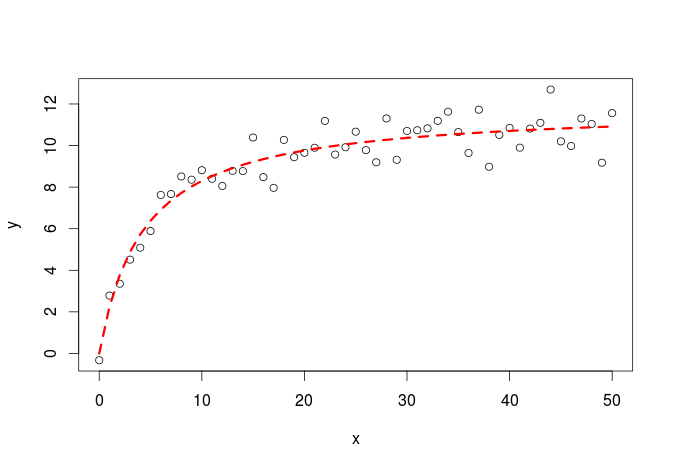

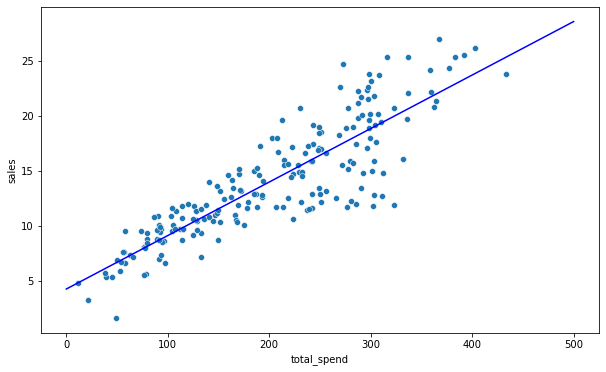

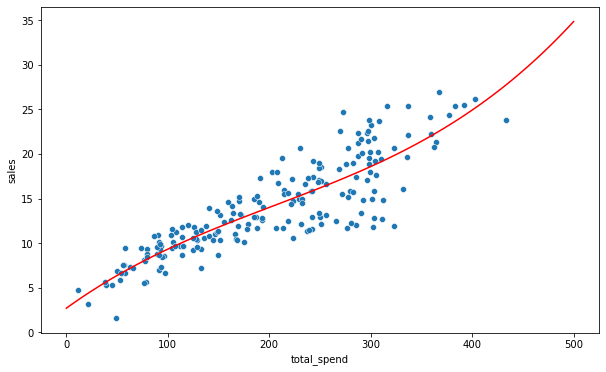

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Polynomial Features

In [2]:
from sklearn.preprocessing import PolynomialFeatures

# poly featureslar üretebilmek için PolynomialFeatures fonksiyonunu import ediyoruz.

In [3]:
data = np.array([[2, 3, 4]]) 
print(data)

# Bu fonksiyonun nasıl poly featurlar ürettiğini görmek için 3 öğesi olan bir datayı 2. dereceden poly featurlara
# dönüştüreceğiz.

[[2 3 4]]


In [4]:
trans = PolynomialFeatures(degree = 2, include_bias =False)

# fonksiyon içerisine istediğimiz dereceyi yazıyoruz. Linear regressionda intercept değerimiz bizim biasımız olduğundan
# ayrıca bir bias eklememize gerek olmadığından include_bias parametresini False yapıyoruz.
# include_bias=True olarak kalsada sonuçlarımız çok değişmiyor ama tercih edilmiyor.

In [5]:
trans.fit(data) 
# 2, 3, 4 , 2x3, 2x4, 3x4, 2**2, 3**2, 4**2 --> 2. derecenin örnek dönüşüm formülü
#tüm features kombinasyonu yapıyor

# fit hem ML algoritmalarında hem de dönüşüm algoritmalarında kullanılır. ML algoritmalarında eğitim yaparken dönüşüm
# algoritmalarında yapacağı dönüşüm formülünü oluşturur. transform komutu ile de elimizdeki gözlemler bu formüle
# yerleştirilerek dönüşüm elde edilir.

PolynomialFeatures(include_bias=False)

In [6]:
# poly degree=3
# 2, 3, 4, 2x3, 2x4, 3x4, 2**2, 3**2, 4**2, 2x3x4, 3x2**2, 4x2**2, 2x3**2, 4x3**2, 2x4**2, 3x4**2, 2**3, 3**3, 4**3

#tüm features kombinasyonu yapıyor
# 3. derecenin formülü örnek olarak gösterilmiştir.

In [7]:
trans.transform(data)

# fit ile oluşturulan dönüşüm formülü 2, 3 ve 4 gözlemlerine uygulanarak poly featurlarımızı elde ettik.

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

In [8]:
trans.fit_transform(data)

# fit ve transform işlemlerini tek bir kod ile de pratik şekilde yapabiliyoruz.

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

## Read Dataset

In [9]:
df = pd.read_csv("Advertising.csv")

In [10]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Polynomial Converter

In [11]:
X = df.drop("sales", axis =1)
y = df.sales

In [12]:
polynomial_converter = PolynomialFeatures(degree =2, include_bias =False)

In [13]:
polynomial_converter.fit(X)

# X datamızda bulunan tüm gözlemlere 2. derece dönüşüm formülü oluşturuldu

PolynomialFeatures(include_bias=False)

In [14]:
poly_features = polynomial_converter.transform(X)

# Gözlemler ilgili formüle yerleştirilerek 2. dereceden poly featurlar elde edildi

In [15]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [16]:
poly_features.shape

# 3 olan feature sayımız dönüşüm sonrası 9'a çıktı

(200, 9)

In [17]:
pd.DataFrame(poly_features, columns = ["TV", "radio", "newspaper", "TV^2", "TV&Radio", \
                                   "TV&Newspaper", "Radio^2", "Radio&newspaper", "Newspaper^2"]).head()

# featurları daha kolay okumak için tüm featurlar manuel olarak isimlendirildi

,TV,radio,newspaper,TV^2,TV&Radio,TV&Newspaper,Radio^2,Radio&newspaper,Newspaper^2
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56


In [18]:
X.shape

(200, 3)

## Train | Test Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.2, random_state = 42)

# datamızı train ve test setlerine ayırırken train_test_split fonksiyonunun içine 9 featurelı yeni datamızı veriyoruz

## Model for fitting

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model_poly = LinearRegression()

In [23]:
model_poly.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = model_poly.predict(X_test)

In [25]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test-y_pred}
compare = pd.DataFrame(my_dict)
compare

# predictionlarımızın çok iyileştiğini aşağıda gözlemleyebiliyoruz.

,Actual,pred,residual
95,16.9,17.254436,-0.354436
15,22.4,22.719332,-0.319332
30,21.4,20.427994,0.972006
158,7.3,7.542709,-0.242709
128,24.7,24.371030,0.328970
115,12.6,12.559272,0.040728
69,22.3,22.807850,-0.507850
170,8.4,8.343714,0.056286
174,11.5,12.058602,-0.558602
45,14.9,15.690246,-0.790246


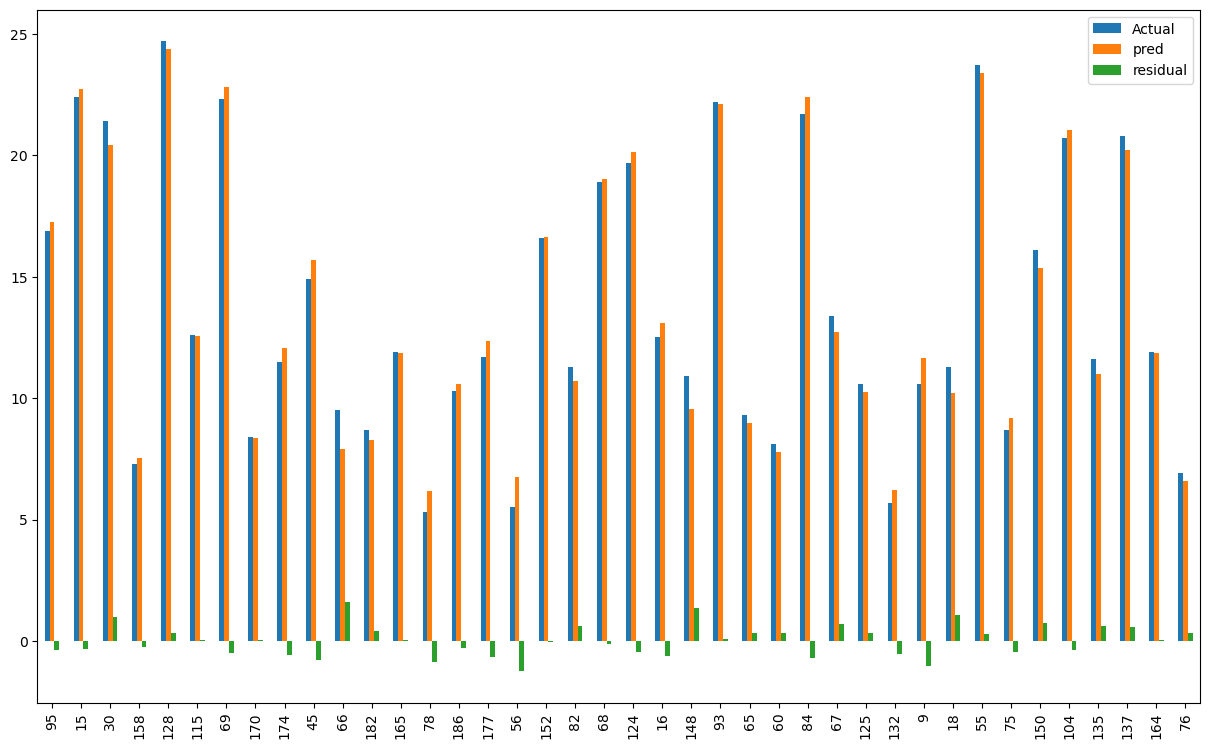

In [26]:
compare.plot(kind='bar',figsize=(15,9))
plt.show();

## Poly Coefficients

In [27]:
model_poly.coef_

# 9 featura ait katsayıları alıyoruz.

array([ 5.32356160e-02,  1.70980451e-02,  1.05807447e-02, -1.12286779e-04,
        1.11121741e-03, -7.37989541e-05,  1.32842962e-04,  1.24892479e-04,
        2.79665560e-05])

In [28]:
df_coef = pd.DataFrame(model_poly.coef_, index = ["TV", "radio", "newspaper", "TV^2", "TV&Radio", \
                                   "TV&Newspaper", "Radio^2", "Radio&newspaper", "Newspaper^2"], columns = ["coef"])

# katsayıları daha anlaşılır yapmak maksadıyla isimlendirip df formatına dünüştürüyoruz

In [29]:
df_coef

# datamıza scaling yapmadığımızdan burdaki sıralama bizi yanıltır. scale sonrası alacağımız sıralama güvenilirdir.

,coef
TV,0.053236
radio,0.017098
newspaper,0.010581
TV^2,-0.000112
TV&Radio,0.001111
TV&Newspaper,-0.000074
Radio^2,0.000133
Radio&newspaper,0.000125
Newspaper^2,0.000028


## Evaluation on the Test Set

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [31]:
y_pred = model_poly.predict(X_test)

# metriclerimizi alabilmek için test datası üzerinden predictionlarımızı alıyoruz.

In [32]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score : {R2_score}")
    print(f"MAE {'':<5}: {mae}")
    print(f"MSE {'':<5}: {mse}")
    print(f"RMSE{'':<5}: {rmse}")
    
# metricleri topluca birarada görebilmek için fonksiyonumuz tanımlıyoruz.

In [33]:
eval_metric(y_test, y_pred)

# test setinden aldığımız score bizim bu model için aldığımız nihai yani müşteriye sunulacak scoredur.

Model testing performance:
--------------------------
R2_score : 0.9869181490609603
MAE      : 0.5261794444043775
MSE      : 0.41291022853790366
RMSE     : 0.6425809120553642


In [34]:
y_train_pred = model_poly.predict(X_train)

# datamızın genelleme yapabildiğini veya overfiting/underfiting kontrolünü train datasından score alıp test seti ile
# karşılaştırarak yapıyoruz.

In [35]:
eval_metric(y_train, y_train_pred)

# train ve test seti scorları biribirine yakın alduğundan datamızın genelleme yapabildiğini ve overfiting olmadığını gördük.

Model testing performance:
--------------------------
R2_score : 0.986104518792419
MAE      : 0.4089721951355109
MSE      : 0.36039667447012225
RMSE     : 0.6003304710491733


## Let's find optimal degree of poly

In [36]:
def poly(d):
    
    train_rmse_errors = []
    test_rmse_errors = []
    number_of_features = []
    
    for i in range(1, d):
        polynomial_converter = PolynomialFeatures(degree = i, include_bias = False)
        poly_features = polynomial_converter.fit_transform(X)
        
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)
        
        model = LinearRegression(fit_intercept=True)
        model.fit(X_train, y_train)
        
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
        
        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        
        number_of_features.append(poly_features.shape[1])
        
    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors":test_rmse_errors, 
                         "number of features":number_of_features}, index=range(1,d))


# optimal degree'yi bulabilmek için her degree için train ve test scorlarını en çok tercih edilen rmse metrici üzerinden 
# karşılaştırıp seçimimizi yapacağız.


# 1 ile istediğimiz değer aralığındaki tüm degree değerlerinin train ve test seti rmse scorları ile her degree'ye ait gözlem 
# sayımızı gösteren yukarıdaki fonksiyonu tanımlıyoruz.

In [37]:
poly(7)

# degree derecesi arttıkça hem train hem test seti scorları düşmeye devam ediyor. Ancak belli bir aşamadan sonra(degree 4)
# train scorları düşmeye devam ederken test scorları yükselmeye başlıyor. 

,train_rmse_errors,test_rmse_errors,number of features
1,1.644728,1.781600,3
2,0.600330,0.642581,9
3,0.464824,0.542742,19
4,0.368413,0.786099,34
5,0.250495,8.746473,55
6,0.214046,29.156100,83


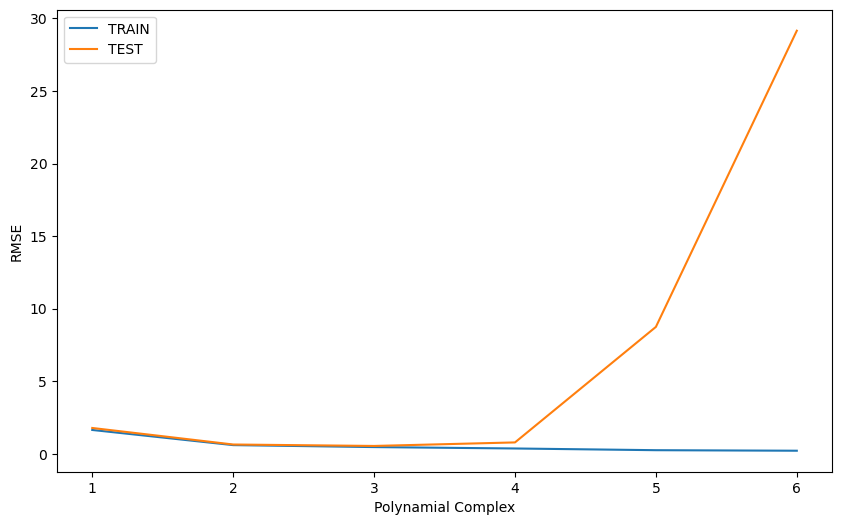

In [38]:
plt.plot(range(1,7), poly(7)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,7), poly(7)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend();

# optimum degree seçilirken patlama noktasından kendimizi uzak tutmaya çalışıyoruz.
# patlama 4. degreede başladığı için 2 veya 3 tercih edilebilir.
# ancak ML'de herzaman hedefimiz az feature ile max scoru elde etmek olduğundan degree 2'yi tercih etmek daha mantıklıdır.

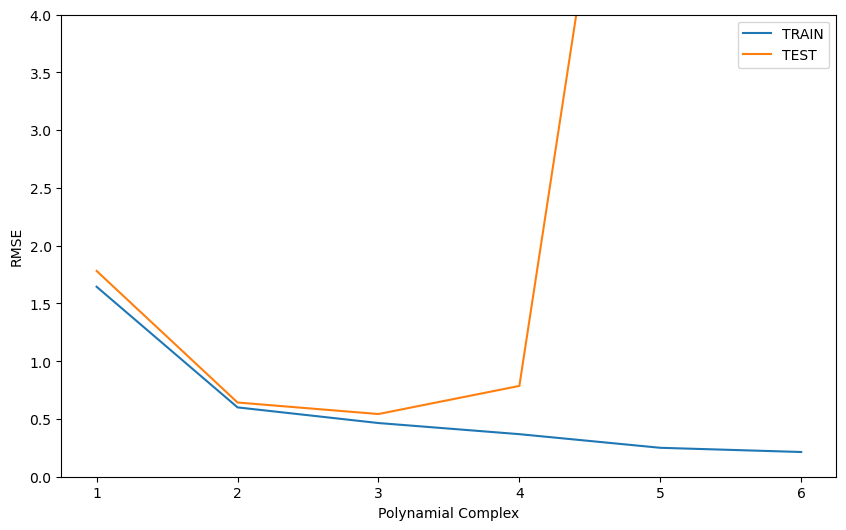

In [39]:
plt.plot(range(1,7), poly(7)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,7), poly(7)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.ylim(0,4)
plt.legend();

# degree 4'deki patlamayı daha net görmek için y eksenini 0-4 birim arasına ylim ile zoom çekiyoruz.

## Finalizing Model Choice

In [40]:
final_poly_converter = PolynomialFeatures(degree = 2, include_bias=False)

# degree 2 seçiyoruz

In [41]:
final_model = LinearRegression()

In [42]:
poly_X = final_poly_converter.fit_transform(X)

# degree 2'ye göre yeni poly featurlarımızı elde ediyoruz. 

In [43]:
final_model.fit(poly_X, y)

# yeni poly featurlarla modelimizi eğitiyoruz.

LinearRegression()

In [44]:
poly_X.shape

(200, 9)

## Predictions

In [45]:
new_record = [[150, 20, 15]]

# 2 boyutlu yeni bir gözlem tanımlıyorum

In [46]:
new_record_poly = final_poly_converter.fit_transform(new_record)

# modelimiz poly featurelara dönüştürülmüş data üzerinden eğitildiğinden yeni gözlemimizi de poly feature dönüştürmemiz 
# gerekiyor.

In [47]:
new_record_poly.shape

# feature sayımızın 9'a çıktığını görüyoruz.

(1, 9)

In [48]:
final_model.predict(new_record_poly) 

array([14.17474185])

## Overfitting

In [49]:
over_poly_converter = PolynomialFeatures(degree = 5, include_bias =False)

# yukarıdaki grafikte degree 5'te overfiting olduğunu görmüştük o yüzden degree 5 seçiyoruz.

In [50]:
over_model = LinearRegression()

In [51]:
poly_features = over_poly_converter.fit_transform(X)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

In [53]:
over_model.fit(X_train, y_train)

LinearRegression()

In [54]:
y_pred_over = over_model.predict(X_test)

In [55]:
eval_metric(y_test, y_pred_over)

Model testing performance:
--------------------------
R2_score : -1.4237035911000198
MAE      : 2.107657497719766
MSE      : 76.50079551989712
RMSE     : 8.746473318995326


In [56]:
y_train_over = over_model.predict(X_train)

In [57]:
eval_metric(y_train, y_train_over)

# train setinin scorları çok iyi iken test setinin scorlarının çok kötü olduğu görüyoruz.

Model testing performance:
--------------------------
R2_score : 0.9975806950323932
MAE      : 0.18795847013622385
MSE      : 0.0627476984660922
RMSE     : 0.2504949070661761


## Underfitting